In [1]:
import os
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Some functions

### Image preprocessing

In [94]:
def load_and_preprocess_image(image_array, input_width=256, input_height=256):
    print('call it')
    # Resize the image to match the input dimensions of the model using OpenCV
    image_array_resized = cv2.resize(image_array, (input_width, input_height))
    
    # Flip the image vertically
    image_array_resized = cv2.flip(image_array_resized, 0)

    # Flip the image horizontally
    image_array_resized = cv2.flip(image_array_resized, 1)
    
    # Normalize pixel values
    image_array_resized = image_array_resized / 255.0  # Normalize pixel values to [0, 1]

    # Expand the dimensions of the image array to match the input shape expected by the model
    input_data = np.expand_dims(image_array_resized, axis=0)

    return input_data



In [4]:
def extract_frame(video_path, frame_number):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the video to the specific frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    ret, frame = cap.read()

    # Release the video capture object
    cap.release()

    if not ret:
        print(f"Could not read frame {frame_number}")
        return None

    # Convert the frame from BGR (OpenCV format) to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    return frame

## Loading the model

In [42]:
model = load_model(os.path.join('model','pianoHand.h5'))

In [98]:
# Define the target input dimensions expected by your model
input_width, input_height = 256, 256

# Specify the video path and frame number
video_path = os.path.join('model', 'pianokeys.mp4')
frame_number = 242 

# Call the function to extract the specific frame from the video
frame = extract_frame(video_path, frame_number)
input = load_and_preprocess_image(frame, input_width, input_height)

call it


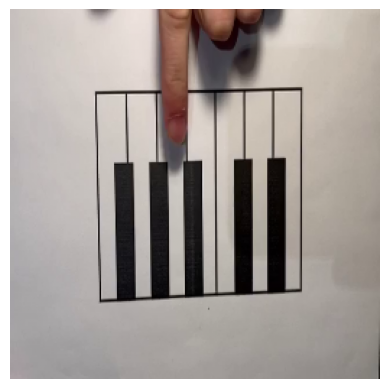

In [99]:
plt.imshow(input[0])  # input_data[0] contains the preprocessed frame
plt.axis('off')  # Hide axes
plt.show()

In [87]:
# Perform inference using the loaded model
predictions = model.predict(input)

# Assuming a classification task with softmax output, get the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Display the predicted class index
print("Predicted Class Index:", predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class Index: 7


In [62]:
n=5 

# Perform inference using the loaded model
predictions = model.predict(input)

# Get the indices of the top n predicted classes (e.g., top 5)
top_n_classes = np.argsort(predictions[0])[::-1][:n]

# Print the ranking of classes
print("Ranking of classes:")
for i, class_index in enumerate(top_n_classes):
    class_probability = predictions[0][class_index]
    print(f"{i+1}. Class Index: {class_index}, Probability: {class_probability:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Ranking of classes:
1. Class Index: 1, Probability: 0.9991
2. Class Index: 7, Probability: 0.0007
3. Class Index: 6, Probability: 0.0001
4. Class Index: 2, Probability: 0.0001
5. Class Index: 5, Probability: 0.0000


## Testing on Video

In [123]:
import time
import matplotlib.pyplot as plt
import cv2
import numpy as np

def load_and_preprocess_image(image_array, input_width=256, input_height=256):
    # Convert BGR to RGB
    image_array_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    
    # Resize the image to match the input dimensions of the model using OpenCV
    image_array_resized = cv2.resize(image_array_rgb, (input_width, input_height))
    
    # Flip the image vertically
    image_array_resized = cv2.flip(image_array_resized, 0)

    # Flip the image horizontally
    image_array_resized = cv2.flip(image_array_resized, 1)
    
    # Normalize pixel values
    image_array_resized = image_array_resized / 255.0  # Normalize pixel values to [0, 1]

    # Expand the dimensions of the image array to match the input shape expected by the model
    input_data = np.expand_dims(image_array_resized, axis=0)

    return input_data

def predict_video(video_path, model, interval=5, frame_interval=50):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    frame_number = 0
    last_prediction_time = time.time()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        current_time = time.time()
        if frame_number % frame_interval == 0:
            # Preprocess the frame
            input_data = load_and_preprocess_image(frame)
            
            # Perform inference using the loaded model
            predictions = model.predict(input_data)

            # Get the predicted class index
            predicted_class_index = np.argmax(predictions, axis=1)[0]
            
            # Display the preprocessed frame and the predicted class using Matplotlib
            plt.imshow(input_data[0])
            plt.title(f"Preprocessed Frame {frame_number}: Predicted Class Index: {predicted_class_index}")
            plt.axis('off')
            plt.show()
            
            # Update the last prediction time
            last_prediction_time = current_time

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame_number += 1

    # Release the video capture object
    cap.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


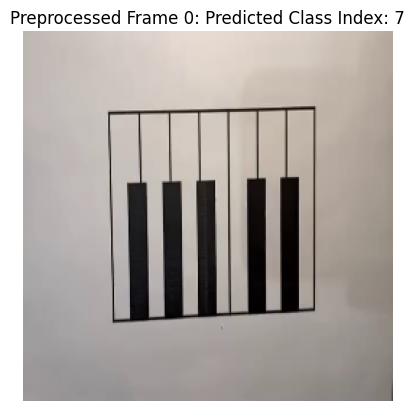

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


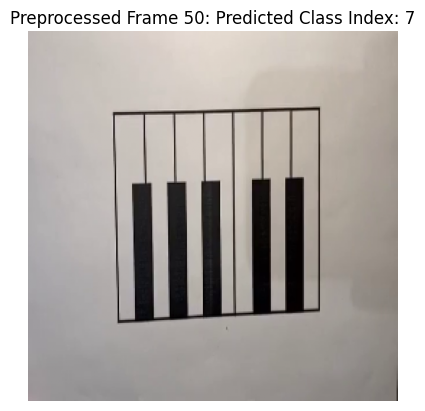

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


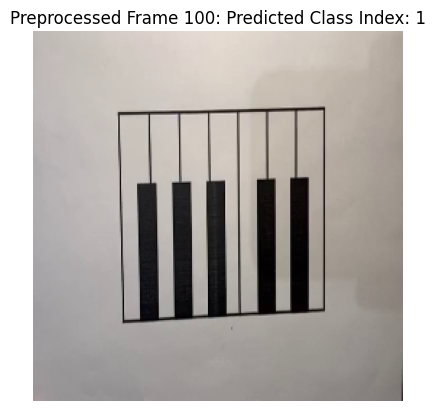

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


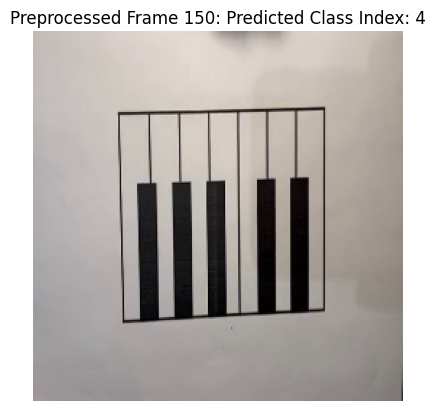

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


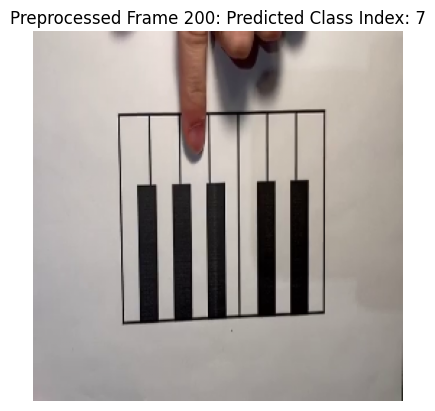

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


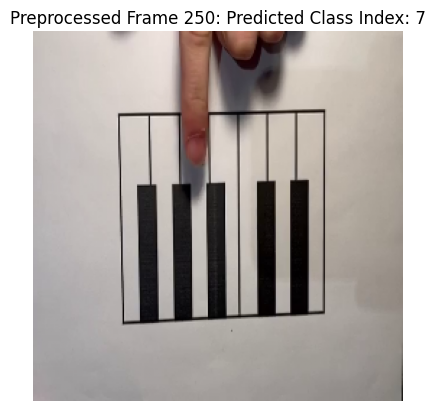

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


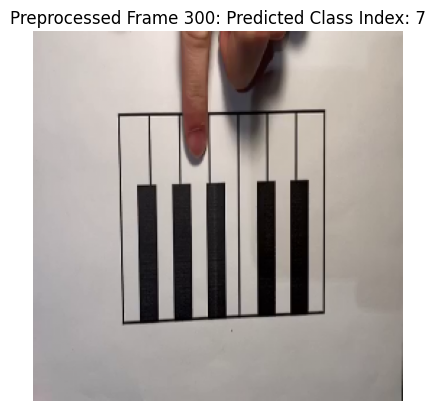

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


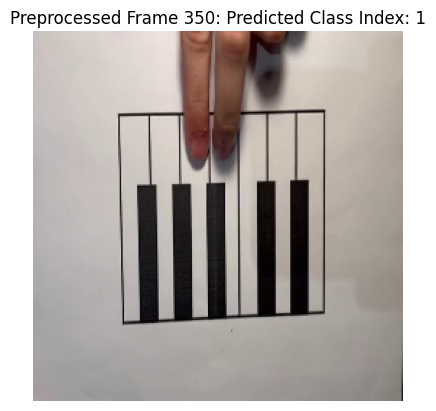

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


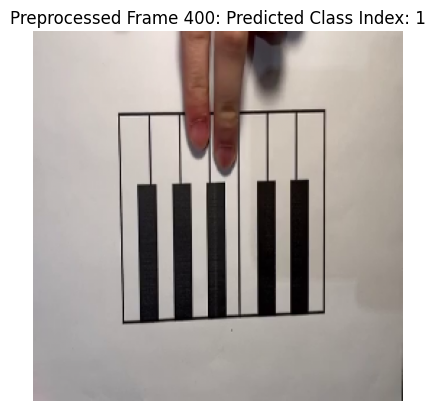

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


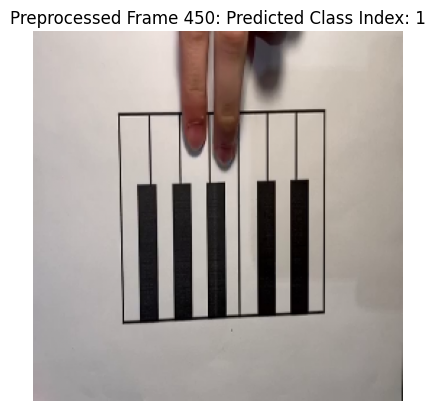

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


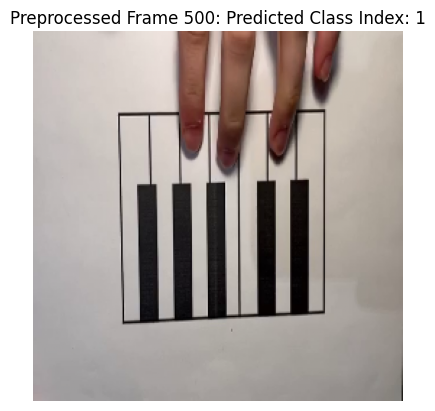

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


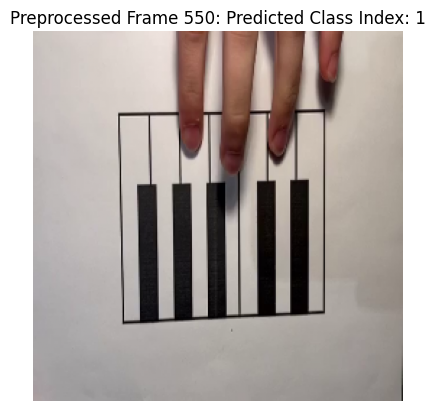

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


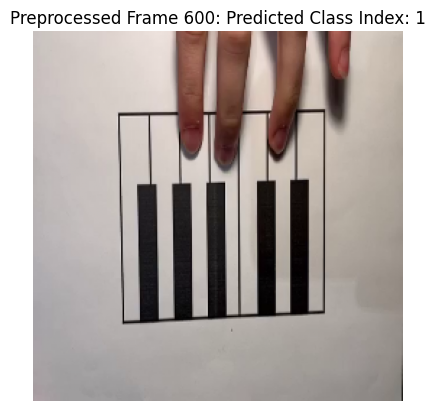

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


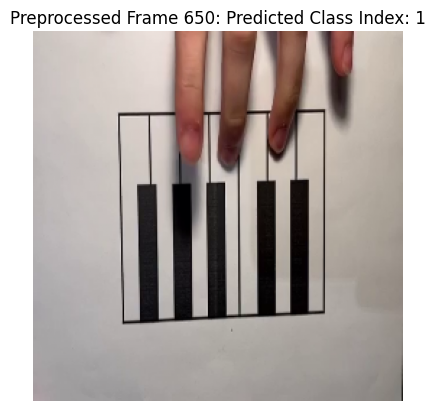

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


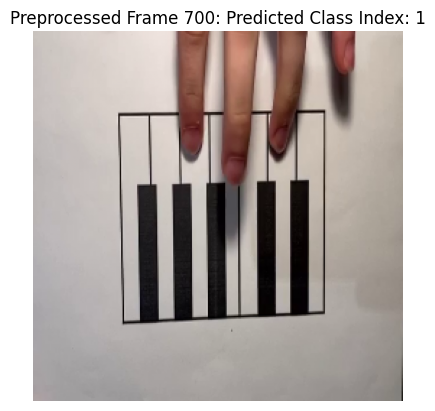

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


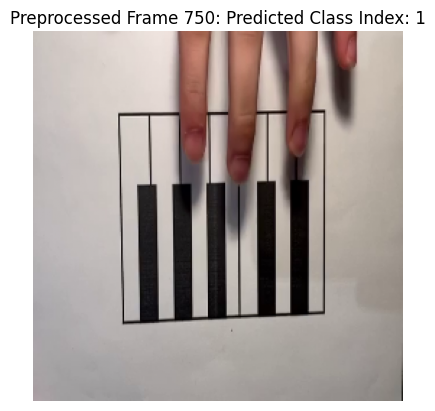

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


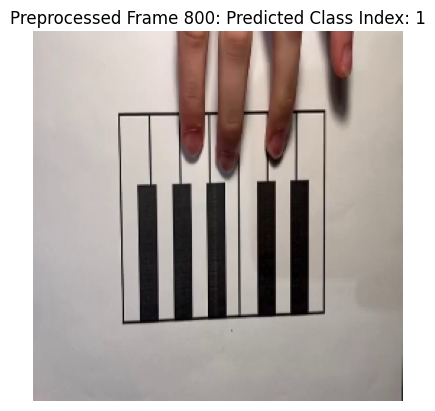

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


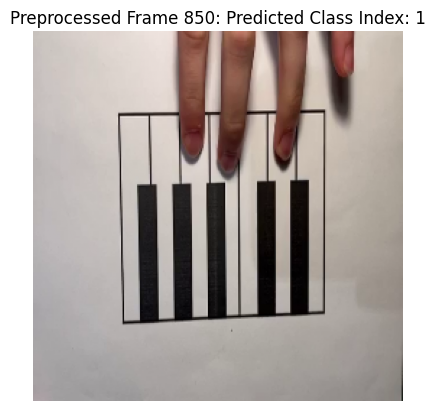

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


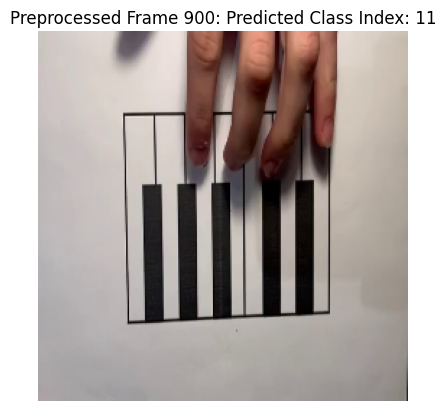

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


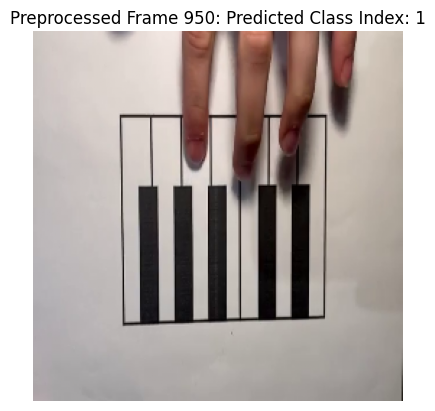

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


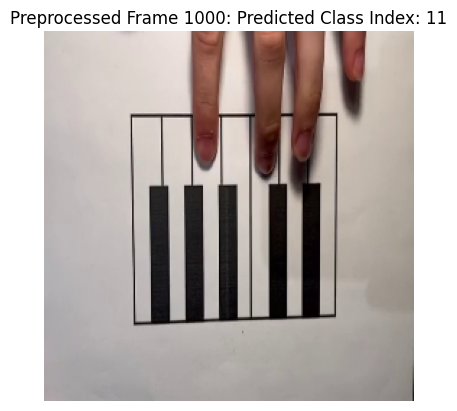

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


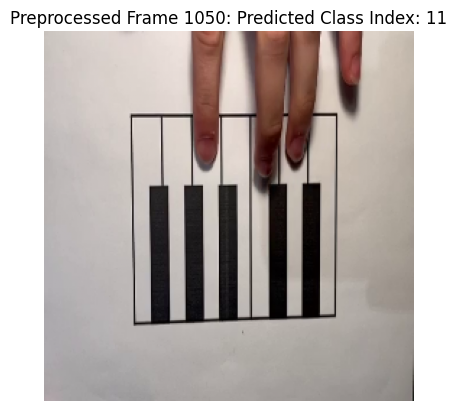

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


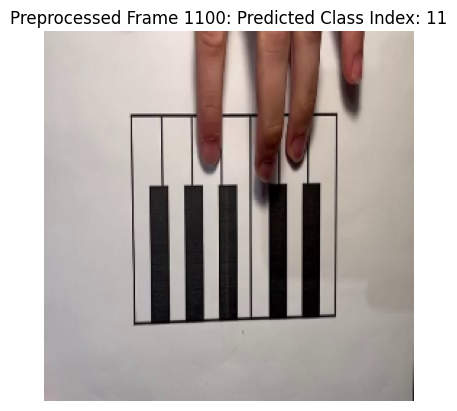

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


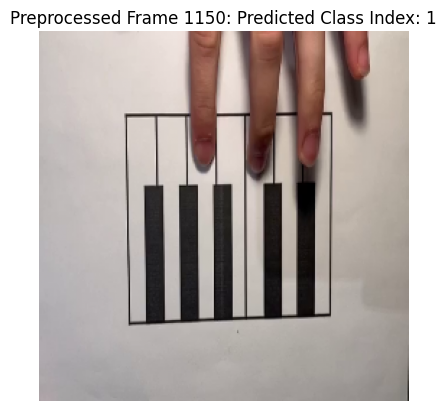

In [128]:
# Cargar el modelo
model = load_model(os.path.join('model','pianoHand.h5'))

# Establecer la función de preprocesamiento de datos de entrada
input_data_func = load_and_preprocess_image

# Definir la ruta del video
video_path = os.path.join('model', 'pianokeys.mp4')

# Llamar a la función predict_video
predict_video(video_path, model)

In [122]:
import cv2

def get_total_frames(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video file.")
        return None

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Release the video capture object
    cap.release()

    return total_frames

# Example usage:
video_path = os.path.join('model', 'pianokeys.mp4')
total_frames = get_total_frames(video_path)
if total_frames is not None:
    print(f"Total frames in the video: {total_frames}")

Total frames in the video: 1198
